In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn
import torch.nn.functional as F
import torch.optim
from torch_geometric.nn import TransformerConv, global_mean_pool
from torch_geometric.loader import DataLoader
import os
current_path = os.getcwd()
import shutil
import glob
from qiskit import QuantumCircuit
import pickle

from torchpack.utils.config import configs
from torchpack.utils.typing import Optimizer, Scheduler

import shap

import random
random.seed(1234)

from data_preparation import execution, helper, alr

# Execution Time - FakeWashington

In [4]:
washington = current_path + '/data/washington'

destination_dir = current_path + '/data/quantum_circuits'
source_dir = current_path + '/data/quantum_circuits_new'

for i in range(1, 4):
    if not os.path.exists(source_dir):
        os.makedirs(source_dir)
    if not os.path.exists(washington):
        os.makedirs(washington)
    execution.Execution().calculate_execution_time('washington', 120)
    
    pattern = os.path.join(destination_dir, '*.qasm')
    qasm_files = glob.glob(pattern)
    
    if not qasm_files:
        for filename in os.listdir(source_dir):
            # Construct the full file paths
            source_file = os.path.join(source_dir, filename)
            destination_file = os.path.join(destination_dir, filename)

            # Move each file to the destination directory
            shutil.move(source_file, destination_file)
        os.rename(washington, washington + '_' + str(i))
    else:
        break


In [5]:
execution.Execution().calculate_average_execution_time('washington', 3)

# Execution Time - FakeSherbrooke

In [6]:
sherbrooke = current_path + '/data/sherbrooke'

destination_dir = current_path + '/data/quantum_circuits'
source_dir = current_path + '/data/quantum_circuits_new'

for i in range(1, 4):
    if not os.path.exists(source_dir):
        os.makedirs(source_dir)
    if not os.path.exists(sherbrooke):
        os.makedirs(sherbrooke)
    execution.Execution().calculate_execution_time('sherbrooke', 120)
    
    pattern = os.path.join(destination_dir, '*.qasm')
    qasm_files = glob.glob(pattern)
    
    if not qasm_files:
        for filename in os.listdir(source_dir):
            # Construct the full file paths
            source_file = os.path.join(source_dir, filename)
            destination_file = os.path.join(destination_dir, filename)

            # Move each file to the destination directory
            shutil.move(source_file, destination_file)
        os.rename(sherbrooke, sherbrooke + '_' + str(i))
    else:
        break


In [7]:
execution.Execution().calculate_average_execution_time('sherbrooke', 3)

# Simulators Combination

In [18]:
source_path = str(helper.get_path_training_data())

In [34]:
data_washington = pd.read_csv(source_path + '/washington.csv')

In [35]:
data_washington.head()

,quantum_circuit,time_taken,device
0,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[1...",1.442981,washington
1,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[6...",0.835995,washington
2,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[7...",0.854356,washington
3,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[2...",0.703233,washington
4,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[1...",1.356878,washington


In [36]:
data_sherbrooke = pd.read_csv(source_path + '/sherbrooke.csv')

In [37]:
data_total = pd.concat([data_washington, data_sherbrooke])

In [7]:
data_total[['time_taken', 'device']].to_csv(source_path + '/data_total.csv')

In [38]:
sample, time_taken =\
execution.Execution().generate_training_sample_execution_time(data_total)

In [39]:
sample

[Data(edge_index=[2, 47125], num_nodes=24000, x=[24000, 178], global_features=[51]),
 Data(edge_index=[2, 4688], num_nodes=2511, x=[2511, 178], global_features=[51]),
 Data(edge_index=[2, 5546], num_nodes=2955, x=[2955, 178], global_features=[51]),
 Data(edge_index=[2, 23], num_nodes=20, x=[20, 178], global_features=[51]),
 Data(edge_index=[2, 42721], num_nodes=21777, x=[21777, 178], global_features=[51]),
 Data(edge_index=[2, 85], num_nodes=60, x=[60, 178], global_features=[51]),
 Data(edge_index=[2, 842], num_nodes=723, x=[723, 178], global_features=[51]),
 Data(edge_index=[2, 49], num_nodes=39, x=[39, 178], global_features=[51]),
 Data(edge_index=[2, 758], num_nodes=651, x=[651, 178], global_features=[51]),
 Data(edge_index=[2, 9895], num_nodes=5192, x=[5192, 178], global_features=[51]),
 Data(edge_index=[2, 43440], num_nodes=22140, x=[22140, 178], global_features=[51]),
 Data(edge_index=[2, 12427], num_nodes=6488, x=[6488, 178], global_features=[51]),
 Data(edge_index=[2, 3136], nu

In [40]:
sample_1 = helper.refine_training_data(sample)

[0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 44, 45, 46, 47, 48, 49, 50]


In [41]:
sample_2 = helper.standardization_training_data(sample_1)

In [42]:
for i in range(len(sample_2)):
    sample_2[i].y = time_taken[i]

In [43]:
sample_2

[Data(edge_index=[2, 47125], num_nodes=24000, x=[24000, 178], global_features=[41], y=1.4429810523986817),
 Data(edge_index=[2, 4688], num_nodes=2511, x=[2511, 178], global_features=[41], y=0.8359946966171264),
 Data(edge_index=[2, 5546], num_nodes=2955, x=[2955, 178], global_features=[41], y=0.8543561697006226),
 Data(edge_index=[2, 23], num_nodes=20, x=[20, 178], global_features=[41], y=0.7032328367233276),
 Data(edge_index=[2, 42721], num_nodes=21777, x=[21777, 178], global_features=[41], y=1.3568777084350585),
 Data(edge_index=[2, 85], num_nodes=60, x=[60, 178], global_features=[41], y=0.6822645902633667),
 Data(edge_index=[2, 842], num_nodes=723, x=[723, 178], global_features=[41], y=0.7657728433609009),
 Data(edge_index=[2, 49], num_nodes=39, x=[39, 178], global_features=[41], y=0.634613299369812),
 Data(edge_index=[2, 758], num_nodes=651, x=[651, 178], global_features=[41], y=0.7746134519577026),
 Data(edge_index=[2, 9895], num_nodes=5192, x=[5192, 178], global_features=[41], y=

In [16]:
file = open(source_path + '/training_data_standardization.npy', "wb")
pickle.dump(sample_2, file)
file.close()

# Active Learning

In [3]:
alr.generate_active_learning_training_sample()

In [9]:
osaka_kyoto = alr.load_active_learning_training_sample()

In [10]:
osaka_kyoto_refine = alr.refine_training_data_active_learning(osaka_kyoto)

In [11]:
osaka_kyoto_normalize = alr.normalize_training_data_active_learning(osaka_kyoto_refine)

In [12]:
osaka_kyoto_padding = alr.padding_training_data_active_learning(osaka_kyoto_normalize)

2120


In [13]:
result_path = str(helper.get_path_training_data() / 'osaka_kyoto_padding.npy')
with open(result_path, "wb") as file:
    pickle.dump(osaka_kyoto_padding, file)

In [14]:
result_path = str(helper.get_path_training_data() / 'osaka_kyoto_padding.npy')
with open(result_path, "rb") as file:
    osaka_kyoto_padding = pickle.load(file)

In [15]:
circuit_dict = alr.GX(osaka_kyoto_padding, 340)

In [16]:
alr.generate_active_learning_samples(circuit_dict)

# Execution Time - IBM_OSAKA

In [9]:
osaka = current_path + '/data/osaka'

destination_dir = current_path + '/data/quantum_circuits_osaka'
source_dir = current_path + '/data/quantum_circuits_osaka_new'


for i in range(1, 4):
    if not os.path.exists(source_dir):
        os.makedirs(source_dir)
    if not os.path.exists(osaka):
        os.makedirs(osaka)
    execution.Execution().calculate_execution_time_real_device('osaka')
    
    pattern = os.path.join(destination_dir, '*.qasm')
    qasm_files = glob.glob(pattern)
    
    if not qasm_files:
        for filename in os.listdir(source_dir):
            # Construct the full file paths
            source_file = os.path.join(source_dir, filename)
            destination_file = os.path.join(destination_dir, filename)

            # Move each file to the destination directory
            shutil.move(source_file, destination_file)
        os.rename(osaka, osaka + '_' + str(i))
    else:
        break

In [10]:
execution.Execution().calculate_average_execution_time('osaka', 3)

# Execution Time - IBM_KYOTO

In [11]:
kyoto = current_path + '/data/kyoto'

destination_dir = current_path + '/data/quantum_circuits_kyoto'
source_dir = current_path + '/data/quantum_circuits_kyoto_new'


for i in range(1, 4):
    if not os.path.exists(source_dir):
        os.makedirs(source_dir)
    if not os.path.exists(kyoto):
        os.makedirs(kyoto)
    execution.Execution().calculate_execution_time_real_device('kyoto')
    
    pattern = os.path.join(destination_dir, '*.qasm')
    qasm_files = glob.glob(pattern)
    
    if not qasm_files:
        for filename in os.listdir(source_dir):
            # Construct the full file paths
            source_file = os.path.join(source_dir, filename)
            destination_file = os.path.join(destination_dir, filename)

            # Move each file to the destination directory
            shutil.move(source_file, destination_file)
        os.rename(kyoto, kyoto + '_' + str(i))
    else:
        break

In [12]:
execution.Execution().calculate_average_execution_time('kyoto', 3)

# Computers Combination

In [7]:
source_path = str(helper.get_path_training_data())

In [8]:
data_osaka = pd.read_csv(source_path + '/osaka.csv')

In [9]:
data_osaka.head()

,quantum_circuit,time_taken,device
0,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[1...",9.745500,osaka
1,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[6...",6.392260,osaka
2,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[1...",7.166303,osaka


In [10]:
data_kyoto = pd.read_csv(source_path + '/kyoto.csv')

In [11]:
data_kyoto.head()

,quantum_circuit,time_taken,device
0,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[1...",7.635044,kyoto
1,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[1...",6.702934,kyoto
2,"OPENQASM 2.0;\ninclude ""qelib1.inc"";\nqreg q[1...",7.571807,kyoto


In [15]:
data_total_ibm = pd.concat([data_osaka, data_kyoto])

In [16]:
source_path = str(helper.get_path_training_data())

In [17]:
data_total_ibm[['time_taken', 'device']].to_csv(source_path + '/data_total_ibm.csv')

In [18]:
sample_ibm, time_taken_ibm =\
execution.Execution().generate_training_sample_execution_time(data_total_ibm)

In [19]:
sample_ibm

[Data(edge_index=[2, 16128], num_nodes=8316, x=[8316, 178], global_features=[51]),
 Data(edge_index=[2, 11656], num_nodes=6045, x=[6045, 178], global_features=[51]),
 Data(edge_index=[2, 11448], num_nodes=5936, x=[5936, 178], global_features=[51]),
 Data(edge_index=[2, 12098], num_nodes=6267, x=[6267, 178], global_features=[51]),
 Data(edge_index=[2, 11880], num_nodes=6156, x=[6156, 178], global_features=[51]),
 Data(edge_index=[2, 12320], num_nodes=6380, x=[6380, 178], global_features=[51])]

In [20]:
sample_ibm_1 = helper.refine_training_data(sample_ibm)

[3, 11, 17, 23, 31, 44, 45, 46, 47, 48, 49, 50]


In [21]:
sample_ibm_2 = helper.standardization_training_data(sample_ibm_1)

In [22]:
for i in range(len(sample_ibm_2)):
    sample_ibm_2[i].y = time_taken_ibm[i]

In [41]:
sample_ibm_2

[Data(edge_index=[2, 16128], num_nodes=8316, x=[8316, 178], global_features=[1, 13], y=9.745499630333336),
 Data(edge_index=[2, 11656], num_nodes=6045, x=[6045, 178], global_features=[1, 13], y=6.392259613),
 Data(edge_index=[2, 11448], num_nodes=5936, x=[5936, 178], global_features=[1, 13], y=7.166303042666667),
 Data(edge_index=[2, 12098], num_nodes=6267, x=[6267, 178], global_features=[1, 13], y=7.635044189666666),
 Data(edge_index=[2, 11880], num_nodes=6156, x=[6156, 178], global_features=[1, 13], y=6.702934228),
 Data(edge_index=[2, 12320], num_nodes=6380, x=[6380, 178], global_features=[1, 13], y=7.571807189666667)]

In [42]:
file = open(source_path + '/total_ibm_standardization.npy', "wb")
pickle.dump(sample_ibm_2, file)
file.close()

In [45]:
file = open(source_path + '/total_ibm_standardization.npy', "rb")
a = pickle.load(file)
file.close()

# Training Model

In [13]:
!python /model/train.py default

In [38]:
helper.calc(all['test_y'], all['test_pred'])

MSE: 2.4283236985667145e-06
R-squared: 0.9962798628505057
NMSE: 0.0037201371494942187


# Cross Validation

In [14]:
!python /model/cross_validation.py default

# Shap Value

In [2]:
class Simple_Model(torch.nn.Module):
    def __init__(self, length_of_gf=41):
        super().__init__()
        self.length_of_gf = length_of_gf

        self.gf_linear1 = torch.nn.Linear(self.length_of_gf, 64)
        self.gf_linear2 = torch.nn.Linear(64, 64)
        
        self.linear1 = torch.nn.Linear(64, 512)
        self.linear2 = torch.nn.Linear(512, 512)
        self.linear3 = torch.nn.Linear(512, 128)
        self.linear4 = torch.nn.Linear(128, 1)
        

    def forward(self, data):
        gf = data
        #gf = gf.to(torch.float32)
        
        gf = self.gf_linear1(gf)
        gf = F.relu(gf)
        gf = self.gf_linear2(gf)
        gf = F.relu(gf)
        x = gf
        
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        x = F.relu(x)
        x = self.linear4(x)
        
        return x

In [3]:
feature_names = [
    'Universal 3-parameter single-qubit gate (u3)',
    'Universal 2-parameter single-qubit gate (u2)',
    'Universal 1-parameter single-qubit gate (u1)',
    'Controlled-NOT gate (cx)',
    'Universal single-qubit gate (u)',
    'Phase gate (p)',
    'Pauli-X gate (x)',
    'Pauli-Y gate (y)',
    'Pauli-Z gate (z)',
    'Hadamard gate (h)',
    'Phase gate (90 degrees) (s)',
    'Phase gate (negative 90 degrees) (sdg)',
    'T gate (π/8 gate) (t)',
    'T gate (negative π/8 gate) (tdg)',
    'Rotation-X gate (rx)',
    'Rotation-Y gate (ry)',
    'Rotation-Z gate (rz)',
    'Square root of X gate (sx)',
    'Inverse square root of X gate (sxdg)',
    'Controlled-Z gate (cz)',
    'Controlled-Y gate (cy)',
    'SWAP gate (swap)',
    'Controlled-Hadamard gate (ch)',
    'Toffoli gate (CCNOT gate) (ccx)',
    'Controlled-SWAP gate (Fredkin gate) (cswap)',
    'Controlled-Rotation-X gate (crx)',
    'Controlled-Rotation-Y gate (cry)',
    'Controlled-Rotation-Z gate (crz)',
    'Controlled-U1 gate (cu1)',
    'Controlled-Phase gate (cp)',
    'Controlled-U3 gate (cu3)',
    'Rotation-XX gate (rxx)',
    'Rotation-ZZ gate (rzz)',
    'Relative phase Toffoli gate (rccx)',
    'num qubits',
    'depth',
    'prog. comm.',
    'crit. dept',
    'entang. ratio',
    'parallelism',
    'liveness'
]

In [4]:
file = open(current_path + "/data/training_data_standardization.npy", "rb")
training_data = pickle.load(file)
file.close()

In [5]:
instance_num = len(training_data)
split_train = 0.9
batch_size = 128
device = torch.device("cpu")

model = Simple_Model()
model.to(device)

modle_file = current_path + '/data/results/no_graph_result/model.pth' 
model.load_state_dict(torch.load(modle_file, map_location=torch.device('cpu')))

model.eval()

Simple_Model(
  (gf_linear1): Linear(in_features=41, out_features=64, bias=True)
  (gf_linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear1): Linear(in_features=64, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=1, bias=True)
)

In [6]:
train = [data.global_features.tolist() for data in training_data[: int(split_train * instance_num)]]
test = [data.global_features.tolist() for data in training_data[int(split_train * instance_num): ]]

In [7]:
explainer = shap.DeepExplainer(model, torch.tensor(train, requires_grad=True))
shap_values = explainer.shap_values(torch.tensor(test, requires_grad=True), check_additivity=False)
mean_abs_shap = np.abs(shap_values).mean(axis=0)

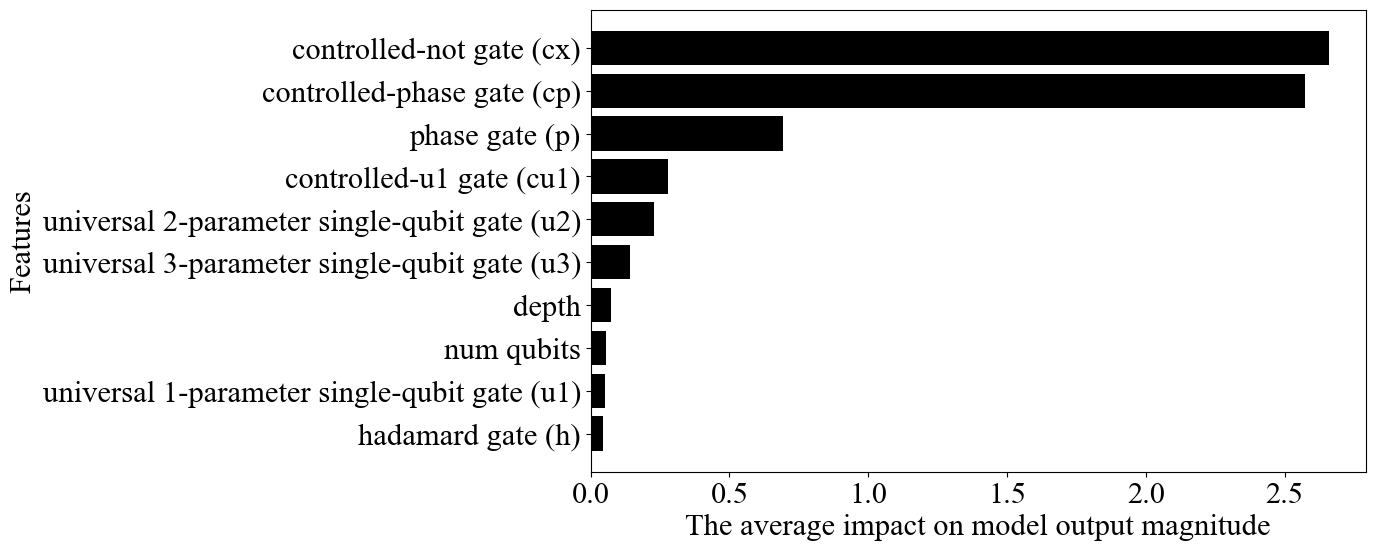

In [8]:
import matplotlib.pyplot as plt

sorted_indices = np.argsort(mean_abs_shap.squeeze())[::-1]
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_shap_values_mean = np.array(mean_abs_shap.squeeze())[sorted_indices]

# Example data from the SHAP plot

# Plotting the sorted bar chart
font_size = 22
plt.figure(figsize=(10, 6))
plt.barh([item.lower() for item in sorted_feature_names][: 10], sorted_shap_values_mean[: 10], color='black')
plt.xlabel('The average impact on model output magnitude', fontsize=font_size)
plt.ylabel('Features', fontsize=font_size)
# plt.title('SHAP Summary Plot')
plt.gca().invert_yaxis()  # Invert y axis to match the original plot's order
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [22]:
file2 = open(current_path + "/data/total_ibm_standardization.npy", "rb")
total_ibm_standardization = pickle.load(file2)
file2.close()

In [23]:
device = torch.device("cpu")
source_path = current_path + '/data/results/'
start_index = 0
instance_num = len(total_ibm_standardization)
fold_size = instance_num // 10
mean_abs_shap_list = []
for i in range(10):
    end_index = start_index + fold_size
    
    train = torch.tensor([data.global_features.squeeze().tolist() for data in total_ibm_standardization[: start_index] + total_ibm_standardization[end_index: ]], requires_grad=True)
    test = torch.tensor([data.global_features.squeeze().tolist() for data in total_ibm_standardization[start_index: end_index]], requires_grad=True)  
    
    model = Simple_Model()
    model.to(device)
    
    filename = source_path + 'no_graph_result/model_' + str(i) + '.pth' 
    model.load_state_dict(torch.load(filename, map_location=torch.device('cpu')))
    
    model.eval()

    explainer = shap.DeepExplainer(model, train)
    shap_values = explainer.shap_values(test, check_additivity=False)

    mean_abs_shap = np.abs(shap_values).mean(axis=0).squeeze()
    mean_abs_shap_list.append(mean_abs_shap)

In [24]:
ibm_mean_abs_shap = np.array(mean_abs_shap_list).mean(axis=0)

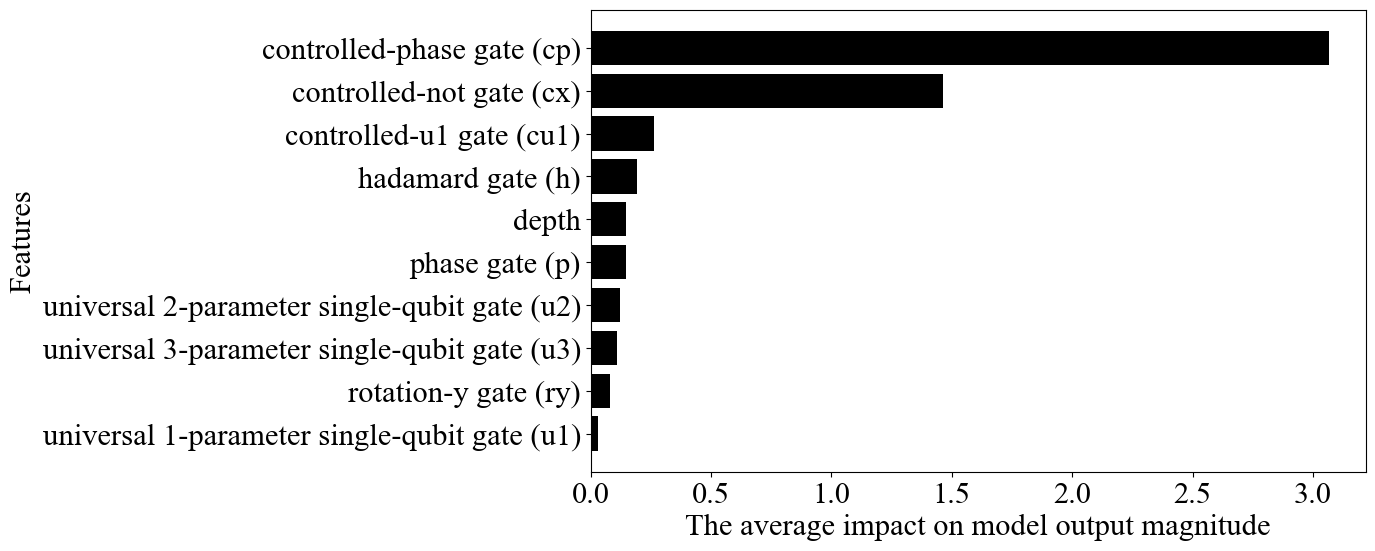

In [25]:
import matplotlib.pyplot as plt

sorted_indices = np.argsort(ibm_mean_abs_shap)[::-1]
ibm_sorted_feature_names = np.array(feature_names)[sorted_indices]
ibm_sorted_shap_values_mean = np.array(ibm_mean_abs_shap)[sorted_indices]

# Example data from the SHAP plot

# Plotting the sorted bar chart
font_size = 22
plt.figure(figsize=(10, 6))
plt.barh([item.lower() for item in ibm_sorted_feature_names][: 10], ibm_sorted_shap_values_mean[: 10], color='black')
plt.xlabel('The average impact on model output magnitude', fontsize=font_size)
plt.ylabel('Features', fontsize=font_size)
# plt.title('SHAP Summary Plot')
plt.gca().invert_yaxis()  # Invert y axis to match the original plot's order
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()
